# 1.0. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
                                              0.0/7.2 MB ? eta -:--:--
     -                                        0.2/7.2 MB 6.1 MB/s eta 0:00:02
     ---                                      0.6/7.2 MB 7.1 MB/s eta 0:00:01
     -----                                    1.0/7.2 MB 6.1 MB/s eta 0:00:02
     -------                                  1.3/7.2 MB 6.3 MB/s eta 0:00:01
     -------                                  1.4/7.2 MB 5.7 MB/s eta 0:00:02
     ----------                               1.9/7.2 MB 6.1 MB/s eta 0:00:01
     ------------                             2.2/7.2 MB 6.0 MB/s eta 0:00:01
     --------------                           2.6/7.2 MB 6.4 MB/s eta 0:00:01
     ---------------                          2.8/7.2 MB 5.9 MB/s eta 0:00:01
     -----------------                        3.1/7.2 MB 6.2 MB/s eta 0:00:01
     --------------------                     3.6/7.2 MB 6.2 MB/s eta 0:00:01

In [2]:
!pip install scikit-learn

                                              0.0/7.1 MB ? eta -:--:--
     -                                        0.2/7.1 MB 6.1 MB/s eta 0:00:02
     ---                                      0.6/7.1 MB 7.6 MB/s eta 0:00:01
     ---                                      0.6/7.1 MB 5.1 MB/s eta 0:00:02
     ------                                   1.2/7.1 MB 6.8 MB/s eta 0:00:01
     -------                                  1.4/7.1 MB 6.4 MB/s eta 0:00:01
     -----------                              2.0/7.1 MB 7.0 MB/s eta 0:00:01
     --------------                           2.6/7.1 MB 7.3 MB/s eta 0:00:01
     ------------------                       3.3/7.1 MB 8.1 MB/s eta 0:00:01
     ---------------------                    3.8/7.1 MB 7.7 MB/s eta 0:00:01
     ------------------------                 4.3/7.1 MB 8.4 MB/s eta 0:00:01
     ---------------------------              4.9/7.1 MB 8.7 MB/s eta 0:00:01
     ------------------------------           5.5/7.1 MB 9.0 MB/s eta 0

In [3]:
!pip list

Package              Version
-------------------- --------
absl-py              1.4.0
astor                0.8.1
backcall             0.2.0
cached-property      1.5.2
colorama             0.4.6
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
entrypoints          0.4
fonttools            4.38.0
gast                 0.5.3
google-pasta         0.2.0
grpcio               1.42.0
h5py                 3.7.0
importlib-metadata   4.11.4
ipykernel            6.15.2
ipython              7.31.1
jedi                 0.18.1
joblib               1.3.2
jupyter_client       7.4.8
jupyter_core         4.11.1
Keras-Applications   1.0.8
Keras-Preprocessing  1.1.2
kiwisolver           1.4.5
Markdown             3.4.3
matplotlib           3.5.3
matplotlib-inline    0.1.6
nest-asyncio         1.5.6
numpy                1.21.6
opencv-python        4.8.0.76
packaging            22.0
parso                0.8.3
pickleshare          0.7.5
Pillow               9.5.0
pip           

In [4]:
import tensorflow as tf
import os

In [5]:
#Only use 50% of GPU
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## 1.1. Remove Dodgy Image

In [6]:
import cv2
import imghdr # allows to check file extensions 
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data' #variable to hold path to data directory

In [8]:
image_extensions = ['jpeg','jpg', 'bmp', 'png'] #list of standard image file extensions

In [9]:
# for loop - looping through directory and then every image to check if they can be used by cv2 and imghdr if not then they are removed
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) #not a valid image
            tip = imghdr.what(image_path) #not a valid image extension
            if tip not in image_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
#How many classes are there?
num_classes = 0

#Iterate Directory
for path in os.listdir(data_dir):
    num_classes += 1
print ('File count:', num_classes)


File count: 2


# 2.0. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#Build the data pipeline
data = tf.keras.utils.image_dataset_from_directory('data') 

Found 4502 files belonging to 2 classes.


In [13]:
len(data)

141

In [14]:
data_iterator = data.as_numpy_iterator() #access the generator from data pipeline - allowing us to loop through data pipeline

In [15]:
batch = data_iterator.next() #accessing the data piepline itself

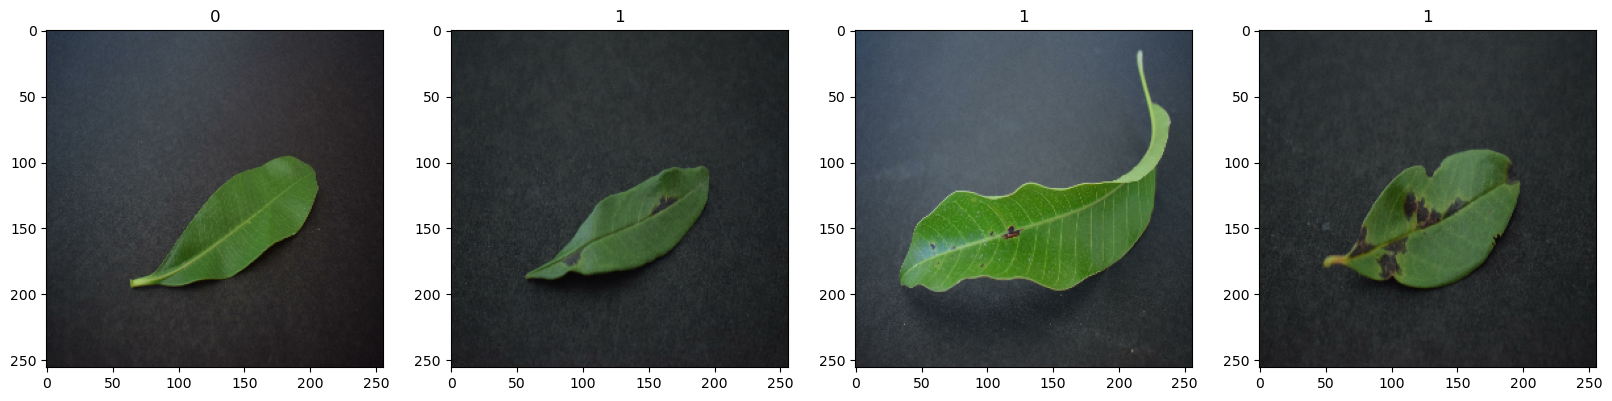

In [16]:
# for loop - looping through the images and classifying them as healthy = 0 and unhealthy = 1
#shows the classifications 0=healthy, 1 = unhealthy
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3.0. Pre-Processing Data

## 3.1. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y)) #map - applies a particular transformation as data is being preprocessed by the data pipeline... x = images, y = target values

In [18]:
scaled_iterator=data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [20]:
#CHECK FOR BATCH MAX AND MIN 0 - 1
#batch [0].min()
batch [0].max()

0.9019608

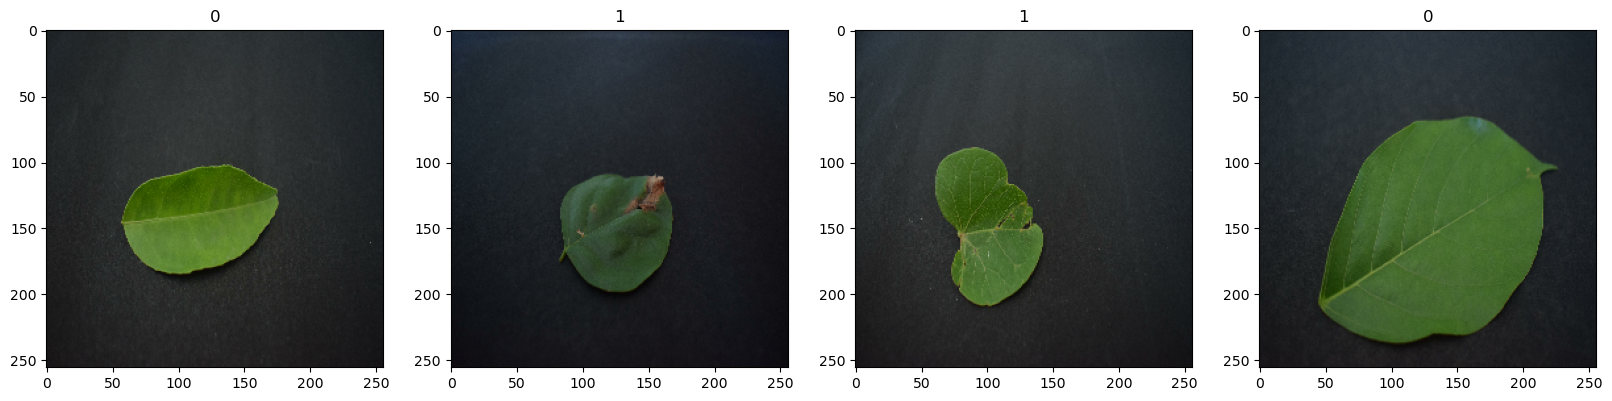

In [21]:
#CHECK IF IMAGES ARE LOADED AND SCALED
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    #shows the classifications healthy = 0 and unhealthy = 1

## 3.2. Split Data

In [22]:
#Partitian Allocation
train_size = int(len(data)*.7) #training will be 70% of data
val_size = int(len(data)*.2) #20% for validation
test_size = int(len(data)*.1+1) #10% testing + 1 because the data is an uneven number

In [23]:
#CHECK that it is equal to length
train_size+val_size+test_size 

141

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
len(test)

15

# 4.0. Deep Learning Model

## 4.1. Build CNN+SVM Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

In [27]:
model = Sequential()

In [28]:
#Adding layers sequestially
#16 = Number of filters
#3,3 = Size of filter
#1 Stride (one pixel and then moves onto the next pixel)
#activitation that gets applied - relu activation - taking the output from the convolution layer and passing it through the relu function - preserve the positive values - allows us to take into account the non linear values 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #condenses the data down

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) #fully connected layers

#Output layer
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [29]:
model.compile('adam', loss='hinge', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 4.2. Train

In [31]:
from tensorflow.keras.callbacks import TensorBoard

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val) #fit is the training function

Epoch 1/20
98/98 [==============================] - 397s 4s/step - loss: 0.9778 - accuracy: 0.5446 - val_loss: 0.7698 - val_accuracy: 0.6853
Epoch 2/20
98/98 [==============================] - 380s 4s/step - loss: 0.7479 - accuracy: 0.6585 - val_loss: 0.8511 - val_accuracy: 0.5804
Epoch 3/20
98/98 [==============================] - 404s 4s/step - loss: 0.6173 - accuracy: 0.7210 - val_loss: 0.5107 - val_accuracy: 0.7868
Epoch 4/20
98/98 [==============================] - 399s 4s/step - loss: 0.4365 - accuracy: 0.8036 - val_loss: 0.4377 - val_accuracy: 0.8025
Epoch 5/20
98/98 [==============================] - 400s 4s/step - loss: 0.3463 - accuracy: 0.8447 - val_loss: 0.4223 - val_accuracy: 0.8594
Epoch 6/20
98/98 [==============================] - 404s 4s/step - loss: 0.2714 - accuracy: 0.8868 - val_loss: 0.4054 - val_accuracy: 0.8214
Epoch 7/20
98/98 [==============================] - 388s 4s/step - loss: 0.2062 - accuracy: 0.9126 - val_loss: 0.3243 - val_accuracy: 0.8895
Epoch 8/20
98

## 4.3. Plot Performance

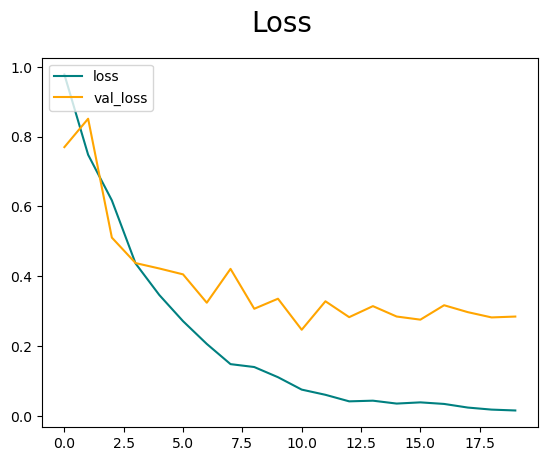

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

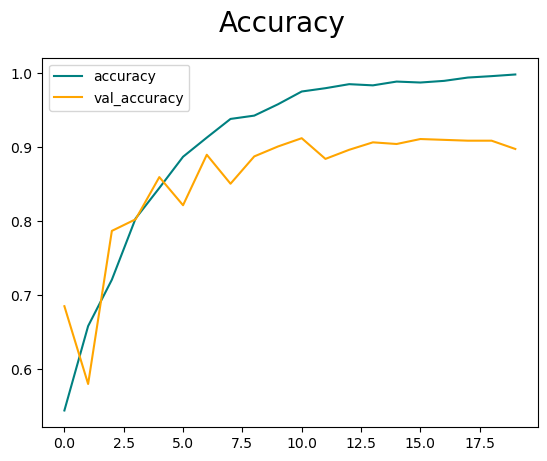

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 5.0 Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 278ms/step


In [40]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.9128205180168152, Recall:0.7982062697410583, Accuracy: 0.8680850863456726


## 5.1 Predications

In [41]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [42]:
test_labels = y

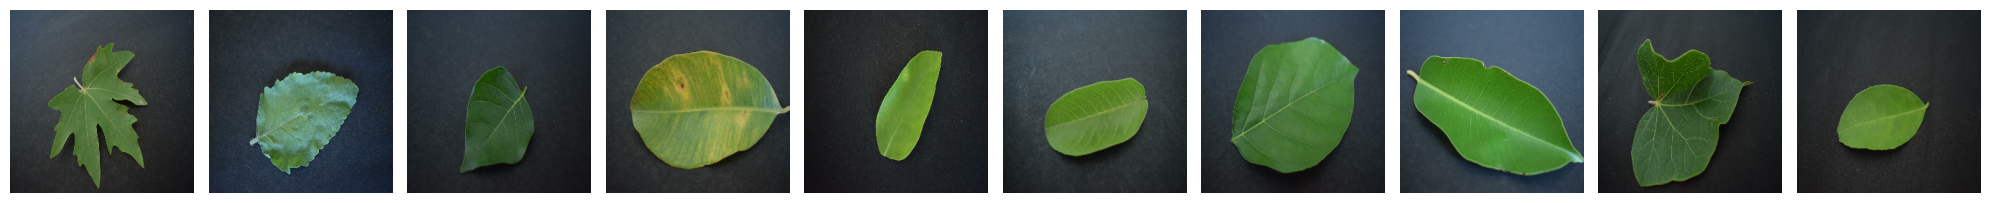

[1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0]


In [43]:
plotImages(X)
print(test_labels)

In [44]:
predictions = yhat

In [45]:
flatten_pred = predictions.flatten()

In [46]:
# Convert to 0 and 1
round_pred=[]

for x in flatten_pred:
    if x < 0:
        x=0
    else:
        x=1
    round_pred.append(x)

In [47]:
round_pred=np.array(round_pred)

In [48]:
round_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [49]:
test_labels

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## 5.2 Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [51]:
cm = confusion_matrix(y_true=test_labels, y_pred=round_pred)

In [52]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
cm_plot_labels = ['healthy','unhealthy']

Confusion matrix, without normalization
[[12  1]
 [ 4  5]]


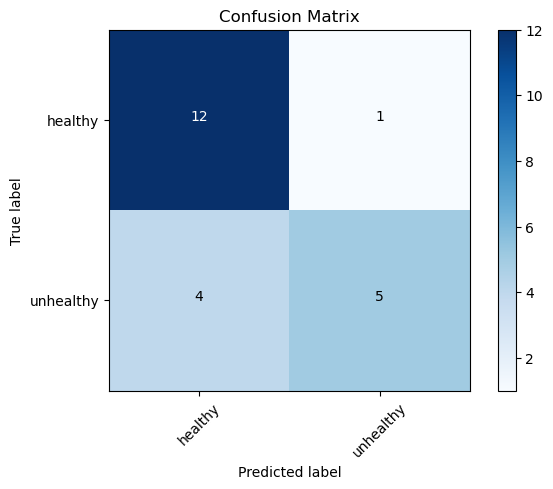

In [54]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# 6.0 Test

In [55]:
import cv2
from matplotlib import pyplot as plt

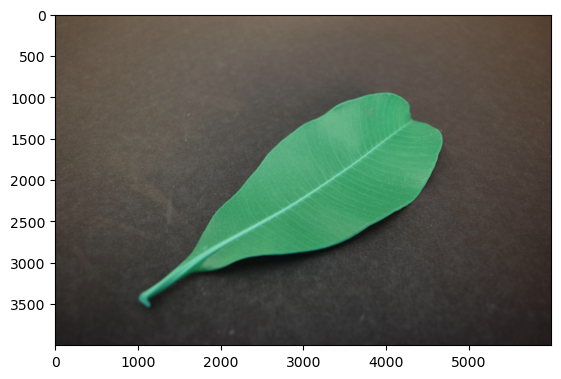

In [56]:
img = cv2.imread('healthy_test.jpg')
plt.imshow(img)
plt.show()

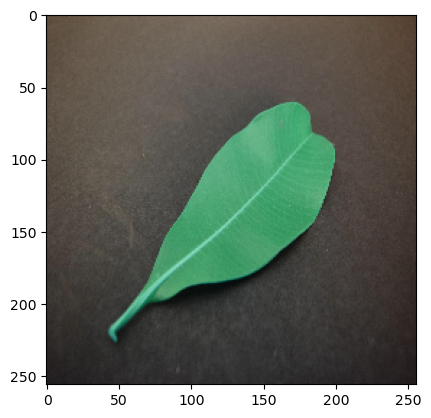

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


In [59]:
yhat

array([[-11.597773]], dtype=float32)

In [60]:
if yhat > 0.5: 
    print(f'Predicted class is Unhealthy')
else:
    print(f'Predicted class is Healthy')

Predicted class is Healthy


# 7.0 Save Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','leafhealth.h5'))

In [63]:
new_model = load_model('models/leafhealth.h5')

In [64]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 95ms/step


array([[-11.597773]], dtype=float32)

In [65]:
#Verify that laoded model has the same achitecture and weights as the saved model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 8.0 Augmentation

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [67]:
chosen_image = random.choice(os.listdir('data/healthy'))

In [68]:
image_path = 'data/healthy/' + chosen_image

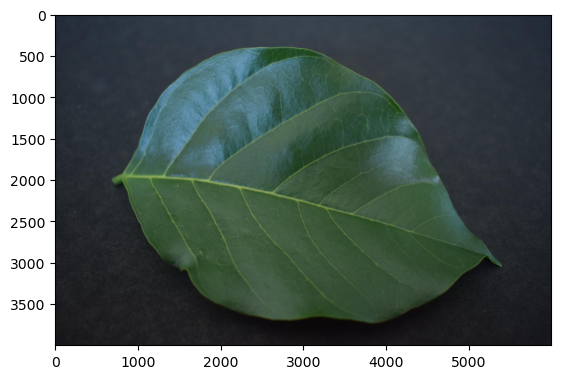

In [69]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [70]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [71]:
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

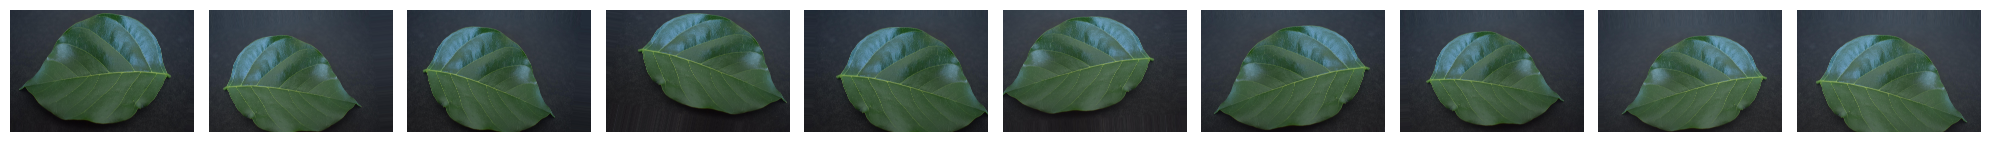

In [72]:
plotImages(aug_images)

In [73]:
aug_iter = gen.flow(image, save_to_dir='data/healthy', save_prefix='aug-image-', save_format='jpeg')